In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

from time_series_preprocessing import train_test_split, normalize_train_features, normalize_test_features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from IPython.display import Image, display

/Users/davidrestrepo/miniforge3/envs/make_health/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'Data/Final_Data/prematurity_phc_coverage_features.xlsx'

In [4]:
def features_labels_set(df, label):
        """ Features """
        # The features to train the model will be all except the values of the actual week 
        features_set = df.drop(columns=[label])
        # Convert pandas data frame to np.array to reshape as 3D Array
        features_set = features_set.to_numpy()
        print(f'The shape of the features is {features_set.shape}')

        """ Labels """
        # We will use Covid cases in last week 
        labels_set = df[label]
        # Convert pandas data frame to np.array
        labels_set = labels_set.to_numpy()
        print(f'The shape of the labels is {labels_set.shape}')

        return features_set, labels_set

In [5]:
def test_model(X_test, y_test, model):
    
    y_pred = model.predict(X_test)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    fpr, tpr, _ = roc_curve(y_test,  y_pred)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Models

* Random Forest
* Logistic Regression
* SVM

In [6]:
def train_models(X_train, X_test, y_train, y_test, models=None, train=None):
    
    # Train and evaluate multiple classification models
    if not(models):
        models = [
            ('Random Forest', RandomForestClassifier()),
            ('Logistic Regression', LogisticRegression()),
            ('SVM', SVC())
        ]
        train = True

    for name, model in models:
        
        print('#'*30, f' {name} ', '#'*30)
        # Train the model
        if train:
            model.fit(X_train, y_train)

        # Make predictions on the testing set
        test_model(X_test, y_test, model)
        print('#'*80)
        
    return models

### Data

In [7]:
df = pd.read_excel(path)
df

,res_codigo_adotado,ano,birth_hosp_perc,married_perc,low_education_perc,single_preg_perc,rob610_perc,7visits_perc,weekend_perc,not_white_perc,...,rob5_ces_perc,rob14_ces_perc,low_weight_perc,numb_gest2_perc,1st_visit_3m_perc,age_19_perc,age_mean,PC_COBERTURA_SF,PC_COBERTURA_AB,premat_1k
0,350750,2012,0.997041,0.469194,0.016607,0.986982,0.204154,0.871734,0.194675,0.080760,...,0.143027,0.275371,0.080473,0.156083,0.868152,0.154438,26.709467,29.470000,47.945000,46.153846
1,351030,2012,0.976834,0.437984,0.059055,0.980695,0.200935,0.803089,0.223938,0.198113,...,0.205607,0.242991,0.088803,0.155660,0.844340,0.200772,25.247104,0.000000,58.114167,46.332046
2,355620,2012,0.996257,0.542922,0.012801,0.963241,0.304012,0.858108,0.198353,0.281614,...,0.223765,0.270833,0.104042,0.083656,0.806836,0.095808,28.422156,0.000000,38.447500,62.125749
3,355030,2012,0.993201,0.369033,0.014549,0.973963,0.166748,0.747099,0.245600,0.473350,...,0.157089,0.263831,0.096514,0.123673,0.810009,0.134363,27.488215,32.544167,59.923333,60.594001
4,353080,2012,1.000000,0.503051,0.035088,0.977450,0.215090,0.767279,0.224631,0.224374,...,0.184893,0.298760,0.093669,0.128848,0.811034,0.143105,26.960971,7.940000,17.723333,50.303556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,354670,2020,1.000000,0.506250,0.003135,0.981250,0.115625,0.887500,0.153125,0.481250,...,0.306250,0.362500,0.084375,0.128125,0.884375,0.106250,27.443750,51.303333,95.395000,53.125000
4379,351750,2020,1.000000,0.402390,0.007968,0.984064,0.147410,0.828685,0.239044,0.366534,...,0.314741,0.338645,0.095618,0.119522,0.876494,0.111554,27.637450,64.320000,97.758333,75.697211
4380,351290,2020,0.989796,0.418367,0.010204,1.000000,0.102041,0.877551,0.244898,0.391753,...,0.326531,0.459184,0.071429,0.183673,0.887755,0.102041,27.336735,94.430000,100.000000,20.408163
4381,353280,2020,0.987952,0.265060,0.000000,0.975904,0.168675,0.843373,0.228916,0.349398,...,0.216867,0.361446,0.096386,0.168675,0.843373,0.156627,26.554217,66.320000,100.000000,72.289157


### Null values

<AxesSubplot:>

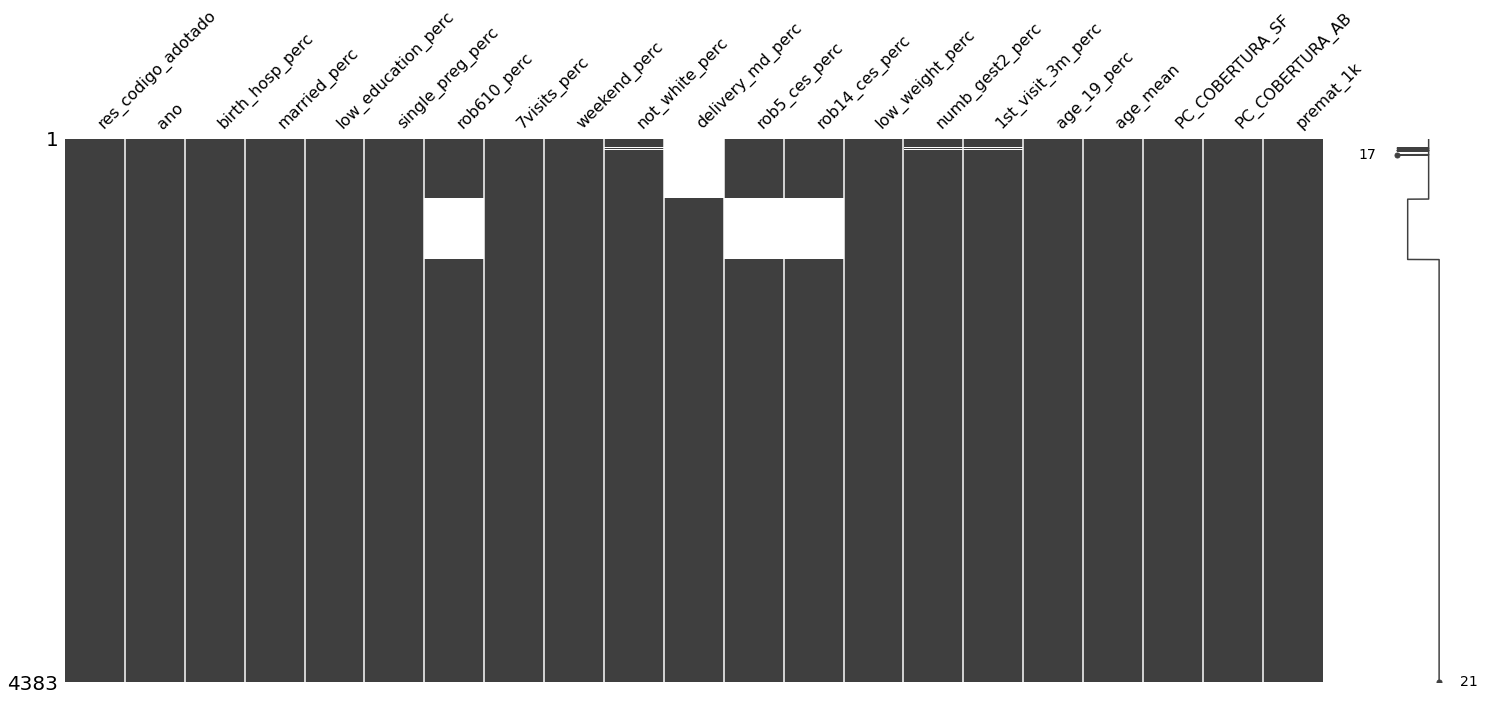

In [8]:
import missingno as msno

msno.matrix(df)

In [9]:
df = df.dropna()

### Outbreak

In [10]:
def outbreak(value, threshold):
    if value > threshold:
        return 1
    else:
        return 0

In [11]:
threshold = df.premat_1k.mean()
df['outbreak'] = df.premat_1k.apply(outbreak, args=[threshold])

### Select variables

In [12]:
to_drop = ['res_codigo_adotado']
df.drop(columns=to_drop, inplace=True)

### Plots

In [13]:
df.head()

,ano,birth_hosp_perc,married_perc,low_education_perc,single_preg_perc,rob610_perc,7visits_perc,weekend_perc,not_white_perc,delivery_md_perc,...,rob14_ces_perc,low_weight_perc,numb_gest2_perc,1st_visit_3m_perc,age_19_perc,age_mean,PC_COBERTURA_SF,PC_COBERTURA_AB,premat_1k,outbreak
974,2014,0.993543,0.369933,0.009221,0.967261,0.137742,0.822470,0.233027,0.402824,0.975275,...,0.333137,0.092937,0.111220,0.854613,0.111720,28.445314,12.743333,40.099167,57.522990,1
975,2014,0.994847,0.285040,0.024483,0.983505,0.121951,0.673604,0.257987,0.579599,0.460929,...,0.181443,0.093095,0.140792,0.760262,0.187908,26.224322,26.751667,50.028333,54.620405,1
976,2014,0.992834,0.373140,0.009109,0.972702,0.144512,0.752093,0.240730,0.489372,0.778540,...,0.276463,0.094326,0.121313,0.830509,0.132228,27.754498,33.084167,58.326667,58.838583,1
977,2014,0.996394,0.504741,0.008380,0.973925,0.180583,0.751598,0.201110,0.361631,0.995547,...,0.347295,0.100693,0.108514,0.858184,0.136200,27.201942,11.906667,33.855000,65.187240,1
978,2014,0.995630,0.493528,0.006344,0.975943,0.137660,0.778130,0.224517,0.304873,0.992451,...,0.342695,0.095379,0.102547,0.879272,0.108489,28.196329,21.779167,38.887500,61.400634,1


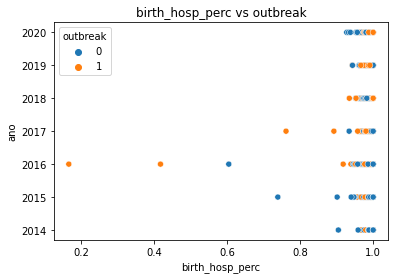

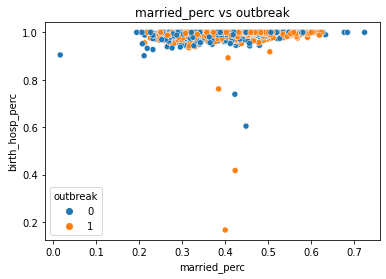

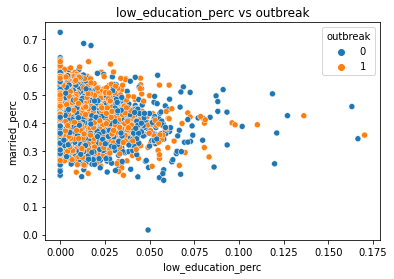

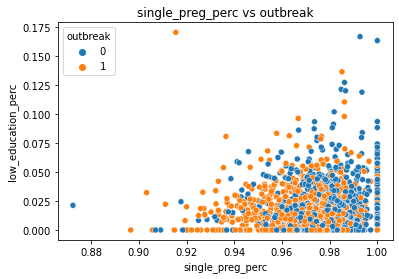

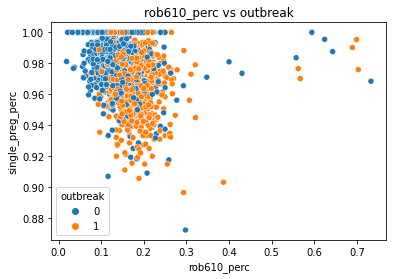

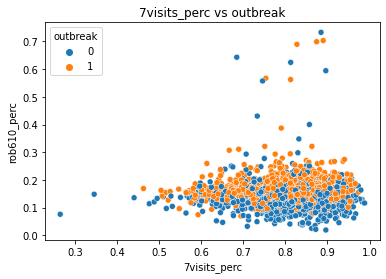

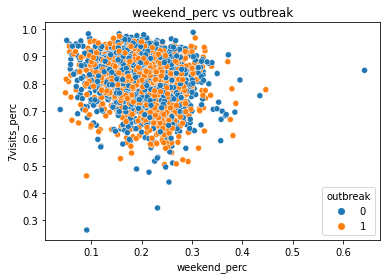

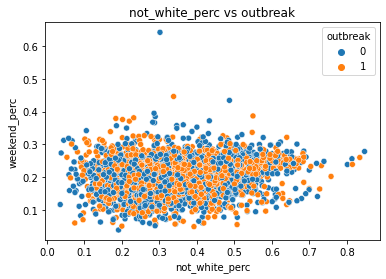

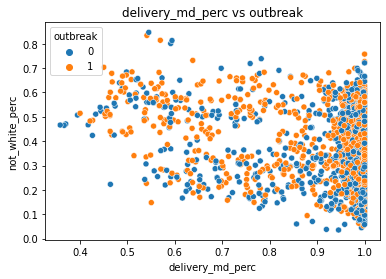

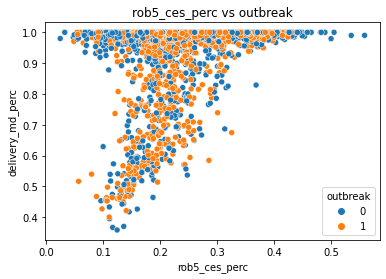

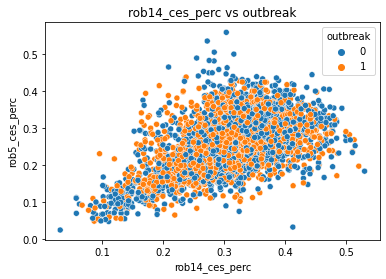

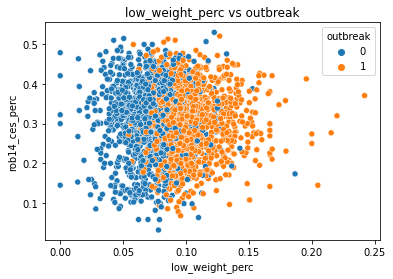

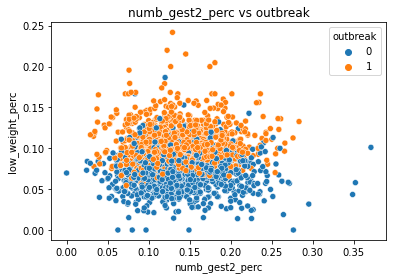

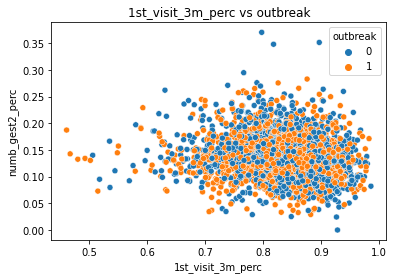

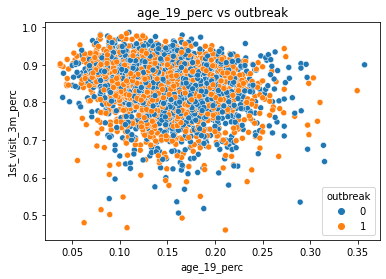

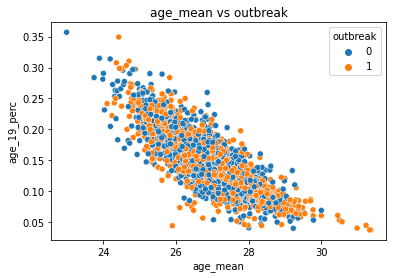

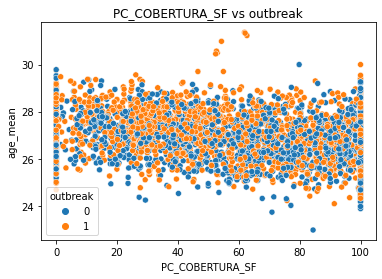

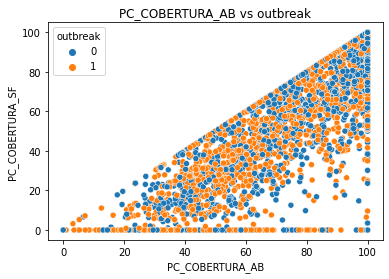

In [14]:
column2 = []
for i, column in enumerate(df.columns):
    if i == 0:
        column2 = column
        continue
        
    if column != 'premat_1k' and column != "outbreak":        
        # x2 vs x3
        sns.scatterplot(x=df[column], y=df[column2], hue=df['outbreak'])
        plt.title(f"{column} vs outbreak")
        plt.show()

        column2 = column

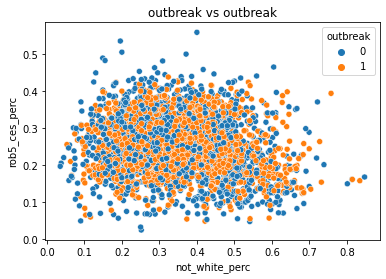

In [15]:
sns.scatterplot(x=df.not_white_perc, y=df.rob5_ces_perc, hue=df['outbreak'])
plt.title(f"{column} vs outbreak")
plt.show()

In [16]:
to_drop = ['premat_1k', 'low_weight_perc']
df.drop(columns=to_drop, inplace=True)

### Preprocessing

In [17]:
train_percentage = 70

feature_range = (0, 1)
scaler=True

label = 'outbreak'

In [18]:
train, test = train_test_split(df, train_percentage = train_percentage)

The train shape is: (2386, 19)
The test shape is: (1023, 19)


In [19]:
train, scalers = normalize_train_features(train, feature_range=feature_range, scaler=scaler, describe=None)
train.head()

,ano,birth_hosp_perc,married_perc,low_education_perc,single_preg_perc,rob610_perc,7visits_perc,weekend_perc,not_white_perc,delivery_md_perc,rob5_ces_perc,rob14_ces_perc,numb_gest2_perc,1st_visit_3m_perc,age_19_perc,age_mean,PC_COBERTURA_SF,PC_COBERTURA_AB,outbreak
974,0.0,0.992252,0.499717,0.054124,0.743547,0.166463,0.776635,0.491363,0.471532,0.961458,0.374777,0.604215,0.316099,0.749340,0.226144,0.662149,0.127433,0.400992,1.0
975,0.0,0.993817,0.379813,0.143703,0.870790,0.144351,0.569187,0.554289,0.698519,0.159684,0.187407,0.300185,0.400145,0.569747,0.466376,0.392783,0.267517,0.500283,1.0
976,0.0,0.991401,0.504246,0.053464,0.786163,0.175943,0.678563,0.510783,0.582663,0.654782,0.265662,0.490626,0.344784,0.703458,0.290810,0.578365,0.330842,0.583267,1.0
977,0.0,0.995673,0.690121,0.049186,0.795747,0.226454,0.677873,0.410898,0.418639,0.993058,0.307518,0.632591,0.308409,0.756136,0.303332,0.511351,0.119067,0.338550,1.0
978,0.0,0.994756,0.674284,0.037239,0.811555,0.166348,0.714847,0.469908,0.345759,0.988232,0.372229,0.623370,0.291450,0.796276,0.215956,0.631951,0.217792,0.388875,1.0


In [20]:
test = normalize_test_features(test, scalers=scalers, scaler=True, describe=None)
test.head()

,ano,birth_hosp_perc,married_perc,low_education_perc,single_preg_perc,rob610_perc,7visits_perc,weekend_perc,not_white_perc,delivery_md_perc,rob5_ces_perc,rob14_ces_perc,numb_gest2_perc,1st_visit_3m_perc,age_19_perc,age_mean,PC_COBERTURA_SF,PC_COBERTURA_AB,outbreak
3360,1.0,1.000000,0.435794,0.152456,1.000000,0.137254,0.698268,0.198558,0.371186,1.0,0.610302,0.509168,0.479836,0.853034,0.447174,0.244296,0.5674,0.71160,0.0
3361,1.0,0.990943,0.446246,0.022149,0.556604,0.290635,0.728431,0.446154,0.356461,1.0,0.561403,0.473513,0.332473,0.659752,0.290328,0.388003,0.3275,0.32750,1.0
3362,1.0,1.000000,0.551011,0.091712,0.510417,0.323662,0.566777,0.415979,0.516058,1.0,0.480387,0.468904,0.266447,0.811170,0.169482,0.538024,0.6217,0.62170,0.0
3363,1.0,1.000000,0.582538,0.041925,0.776190,0.243643,0.496479,0.336070,0.486250,1.0,0.528858,0.466220,0.365414,0.762093,0.346847,0.527575,0.2907,0.73765,0.0
3364,1.0,1.000000,0.529902,0.255198,0.829710,0.141010,0.857410,0.342334,0.442784,1.0,0.421888,0.655439,0.370709,0.798489,0.250881,0.399852,0.1771,0.26490,0.0


### Labels

<AxesSubplot:xlabel='outbreak'>

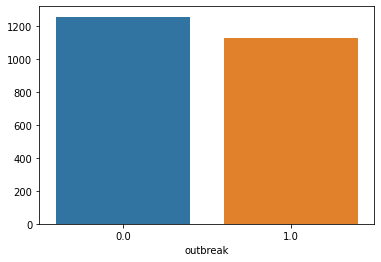

In [21]:
labels_frequency = train.groupby('outbreak').count().iloc[:,0]
sns.barplot(x=labels_frequency.index, y=labels_frequency.values)

In [22]:
X_train, y_train = features_labels_set(train, label)
X_test, y_test = features_labels_set(test, label)

The shape of the features is (2386, 18)
The shape of the labels is (2386,)
The shape of the features is (1023, 18)
The shape of the labels is (1023,)


# Modeling

##############################  Random Forest  ##############################
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68       454
         1.0       0.75      0.74      0.74       569

    accuracy                           0.72      1023
   macro avg       0.71      0.71      0.71      1023
weighted avg       0.72      0.72      0.72      1023



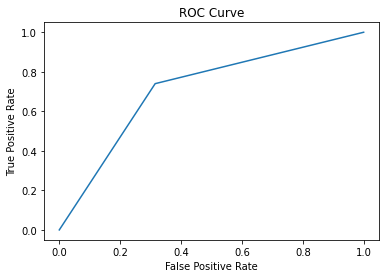

################################################################################
##############################  Logistic Regression  ##############################
              precision    recall  f1-score   support

         0.0       0.70      0.55      0.62       454
         1.0       0.69      0.81      0.75       569

    accuracy                           0.69      1023
   macro avg       0.69      0.68      0.68      1023
weighted avg       0.69      0.69      0.69      1023



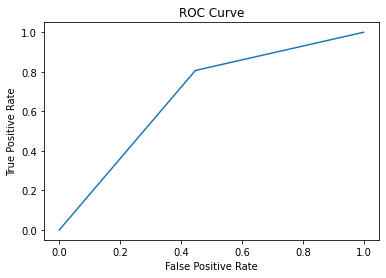

################################################################################
##############################  SVM  ##############################
              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63       454
         1.0       0.70      0.77      0.73       569

    accuracy                           0.69      1023
   macro avg       0.69      0.68      0.68      1023
weighted avg       0.69      0.69      0.69      1023



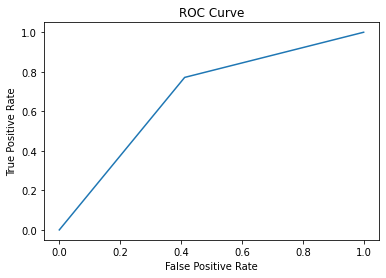

################################################################################


In [23]:
models = train_models(X_train, X_test, y_train, y_test)

## Ethnicity Bias

In [24]:
ethnicity_bias_threshold = df.not_white_perc.mean()
ethnicity_bias_threshold

0.34395052496561335

In [25]:
less_white_test = test[test.not_white_perc > ethnicity_bias_threshold]
print(f'The population with less percentage than the mean is {less_white_test.shape[0]}')
more_with_test = test[test.not_white_perc < ethnicity_bias_threshold]
print(f'The population with more percentage than the mean is {more_with_test.shape[0]}')

The population with less percentage than the mean is 659
The population with more percentage than the mean is 364


### More White People

In [26]:
X_test, y_test = features_labels_set(more_with_test, label)

The shape of the features is (364, 18)
The shape of the labels is (364,)


##############################  Random Forest  ##############################
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       176
         1.0       0.72      0.73      0.72       188

    accuracy                           0.71       364
   macro avg       0.71      0.71      0.71       364
weighted avg       0.71      0.71      0.71       364



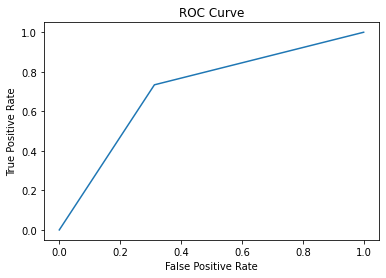

################################################################################
##############################  Logistic Regression  ##############################
              precision    recall  f1-score   support

         0.0       0.71      0.57      0.63       176
         1.0       0.66      0.78      0.72       188

    accuracy                           0.68       364
   macro avg       0.68      0.68      0.67       364
weighted avg       0.68      0.68      0.67       364



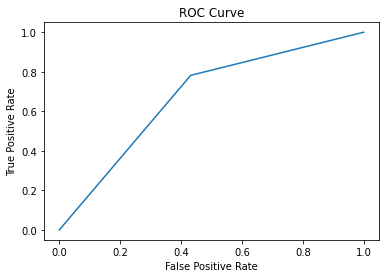

################################################################################
##############################  SVM  ##############################
              precision    recall  f1-score   support

         0.0       0.72      0.60      0.65       176
         1.0       0.68      0.79      0.73       188

    accuracy                           0.70       364
   macro avg       0.70      0.69      0.69       364
weighted avg       0.70      0.70      0.69       364



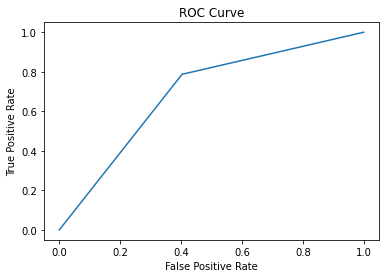

################################################################################


In [27]:
models = train_models(X_train, X_test, y_train, y_test, models=models)

### Less White People

In [28]:
X_test, y_test = features_labels_set(less_white_test, label)

The shape of the features is (659, 18)
The shape of the labels is (659,)


##############################  Random Forest  ##############################
              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67       278
         1.0       0.76      0.74      0.75       381

    accuracy                           0.72       659
   macro avg       0.71      0.71      0.71       659
weighted avg       0.72      0.72      0.72       659



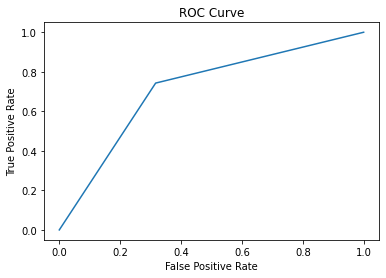

################################################################################
##############################  Logistic Regression  ##############################
              precision    recall  f1-score   support

         0.0       0.69      0.54      0.61       278
         1.0       0.71      0.82      0.76       381

    accuracy                           0.70       659
   macro avg       0.70      0.68      0.68       659
weighted avg       0.70      0.70      0.70       659



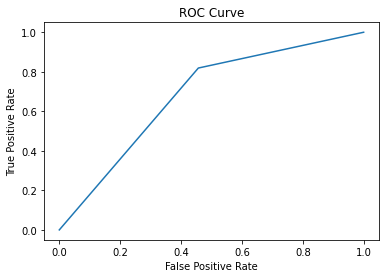

################################################################################
##############################  SVM  ##############################
              precision    recall  f1-score   support

         0.0       0.64      0.58      0.61       278
         1.0       0.71      0.76      0.74       381

    accuracy                           0.69       659
   macro avg       0.68      0.67      0.67       659
weighted avg       0.68      0.69      0.68       659



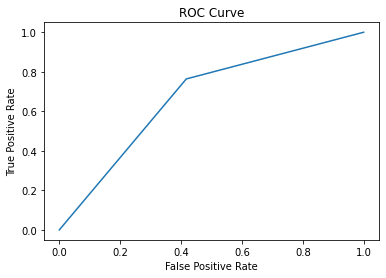

################################################################################


In [29]:
models = train_models(X_train, X_test, y_train, y_test, models=models)

# Age Bias

In [30]:
age_bias_threshold = df.age_19_perc.mean()
age_bias_threshold

0.14496366140568467

In [31]:
older_test = test[test.age_19_perc > age_bias_threshold]
print(f'The population with less percentage than the mean is {older_test.shape[0]}')
younger_test = test[test.age_19_perc < age_bias_threshold]
print(f'The population with more percentage than the mean is {younger_test.shape[0]}')

The population with less percentage than the mean is 868
The population with more percentage than the mean is 155


### Older People

In [32]:
X_test, y_test = features_labels_set(older_test, label)

The shape of the features is (868, 18)
The shape of the labels is (868,)


##############################  Random Forest  ##############################
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       393
         1.0       0.74      0.74      0.74       475

    accuracy                           0.71       868
   macro avg       0.71      0.71      0.71       868
weighted avg       0.71      0.71      0.71       868



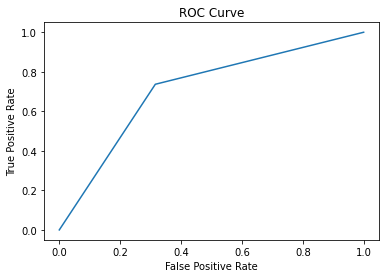

################################################################################
##############################  Logistic Regression  ##############################
              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64       393
         1.0       0.70      0.80      0.74       475

    accuracy                           0.70       868
   macro avg       0.70      0.69      0.69       868
weighted avg       0.70      0.70      0.70       868



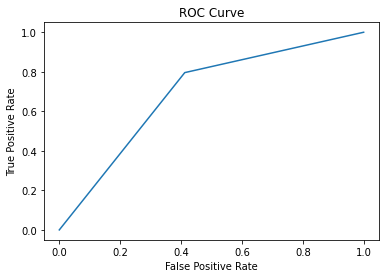

################################################################################
##############################  SVM  ##############################
              precision    recall  f1-score   support

         0.0       0.69      0.61      0.65       393
         1.0       0.70      0.77      0.74       475

    accuracy                           0.70       868
   macro avg       0.70      0.69      0.69       868
weighted avg       0.70      0.70      0.69       868



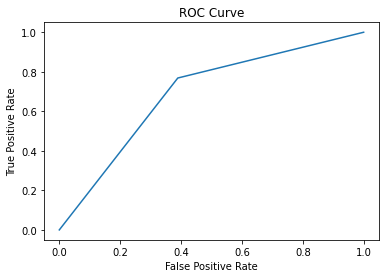

################################################################################


In [33]:
models = train_models(X_train, X_test, y_train, y_test, models=models)

### Younger People

In [34]:
X_test, y_test = features_labels_set(younger_test, label)

The shape of the features is (155, 18)
The shape of the labels is (155,)


##############################  Random Forest  ##############################
              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67        61
         1.0       0.79      0.76      0.77        94

    accuracy                           0.73       155
   macro avg       0.72      0.72      0.72       155
weighted avg       0.73      0.73      0.73       155



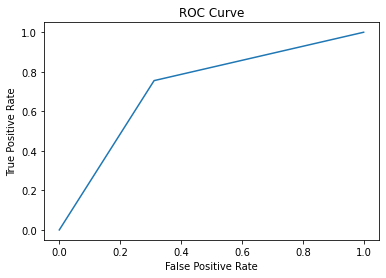

################################################################################
##############################  Logistic Regression  ##############################
              precision    recall  f1-score   support

         0.0       0.61      0.33      0.43        61
         1.0       0.66      0.86      0.75        94

    accuracy                           0.65       155
   macro avg       0.63      0.59      0.59       155
weighted avg       0.64      0.65      0.62       155



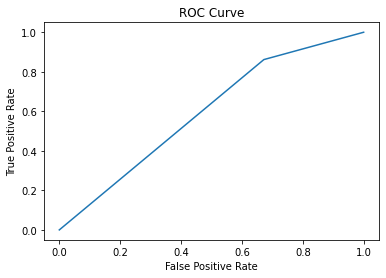

################################################################################
##############################  SVM  ##############################
              precision    recall  f1-score   support

         0.0       0.57      0.44      0.50        61
         1.0       0.69      0.79      0.73        94

    accuracy                           0.65       155
   macro avg       0.63      0.61      0.62       155
weighted avg       0.64      0.65      0.64       155



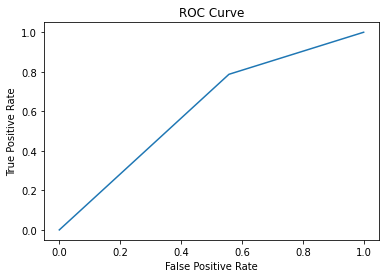

################################################################################


In [35]:
models = train_models(X_train, X_test, y_train, y_test, models=models)